**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Erick Amaro Hernandez
- Sanjith Devineni
- Alex Macias
- Lawrence Ong
- Mingyang Yao

# Research Question

Our question is: Does weight class, event (type of lift: squat, bench press, or deadlift), and gender affect the percentage(%) increase in attempt weight selection(amount of weight the competitor chooses for their next attempt)? For example, given that an athlete has lifted 100kg in an event defined previously, would something like gender or weight class influence whether they pick 105 kgs, 110 kgs, or more for their next attempt? 


## Background and Prior Work

The sport of powerlifting consists of 3 main **events**. The squat, the bench press, and the deadlift. A powerlifting competition gives you 3 attempts at the squat, 3 for the bench press, and 3 for the deadlift, and per event, each attempt must be heavier than the last (within the event), with the max weight lifted in each event summing up to the competitor's "**total**" for a meet. 

When competing in a powerlifting competition, choosing how much weight you'll be lifting has a lot of factors incorporated into it such as your own ability to judge the difficulty of your previous attempts and how you performed on those attempts. As such, attempt selection is an incredibly important skill a powerlifter must attain if they want to be successful in the sport. Seasoned coaches in the sport suggest that attempts start at around 90% of an athlete's max in the event. With 5% jumps between attempts being suggested from attempt 1 to 2, and <3% between attempt 2 and 3. It is also noted that heavier jumps may occur in the last event, the deadlift, due to it being the most exciting event of a powerlifting meet and/or the unique rules that come from it being the final event of a meet. <a name="cite_note-1"></a> [<sup>1</sup>](#cite_ref-1) 

Most of the hype around the deadlift event comes from it contributing on average >40% of an athelete's total regardless of gender according to a previous analysis of the dataset by Kaggle user Steven Wilson <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). The importance of a lifter's deadlift fuels our hypothesis that maybe this lift comes with even higher/riskier jumps in weight per attempt on average. Another thing we can learn from Wilson's analysis and build on is that a larger portion of Men's totals is made up by their bench press, with it making up around 25% of their total in comparison to female lifters where it only makes up 20%. The study also shows the almost trivial trend of a higher athlete body weight being associated with higher totals.

The prior work mostly looks at statistics of powerlifting like athlete totals rather than seeing some psychology behind the sport. We set out to uncover unconscious biases in weight selection for each attempt. If we discover that these biases exist and are significant, then this would help athletes plan out their attempts more efficiently. Athletes could then choose to be more conservative if planning a risky jump (being concious that they may be susceptible to biases found in this project), potentially adding more pounds or kilograms to their meet total rather than failing their next attempt or vice versa if we find out that their category tend to play more conservative. 

[^](#cite_ref-1) Krawczyk, Bryce (6 August, 2023) So You Wanna Be a Powerlifter? Attempt Selection During a Meet. *BarBend.com* https://www.barbend.com/powerlifting-meet-attempt-selection/

[^](#cite-ref2) Steven Wilson (23 Sept. 2020) Strength Differences in Powerlifting by Gender https://www.kaggle.com/code/stevenwilson8/strength-differences-in-powerlifting-by-gender


# Hypothesis


1. We believe there will be no difference between genders when it comes to attempt selection in general. We think this because the different distributions of weight selection a per-event basis will balance eachother out to be equal when comparing just by gender. For example, although women may choose higher squat attempts, their bench attempts will might be lower and vice versa for men.
2. The deadlift will have the higher jumps due to the hype around the amount of weight lifted and it being the main contributor to an athlete's total.
3. Following from the last prediction, and from Wilson's past research on contribution of an event to an athlete's total, we predict that on a per-event basis there will be a difference between men and women's jumps, e.g. since more of men's totals is made up of the bench press, they might have higher jumps than women in the bench press. 


# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Open Powerlifting Database
  - Link to the dataset: https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database
  - Number of observations: 3,043,013
  - Number of variables: 38

The Openpowerlifting dataset is a collection of archived powerlifting competition results from 1946 - 1/1/2023.

Every row of the OpenPowerlifting dataset consists of a record of how a lifter did during a competition. A row contains their age/weight data, what events they decided to compete in, whether they competed Equipped (certain competitions dont allow certain equipment to be used during a lift), geographic data like country,state,town, as well as the name of the Competition. It also includes rows of different scoring systems that take weight, gender, and total lifted in order to compare one's performance to another across varying weight/sex classes. All weight data is stored in Kilograms.

Powerlifting is a sport where the philosophy behind the sport varies drastically. As such, there are results from 300+ federations in this dataset with their own rules behind what counts as a "valid lift". This also includes each federation having their own weight classes. Thankfully, the raw bodyweight a lifter weighed in at on the day of the competition is included as one of the columns, and 5 different scores are precomputed as columns if a lifter's performance was able to be scored.

In order to compare lifters in this dataset, we will standardize to one weight class category, and one scoring system. Weight classes will be standardized to those that the International Powerlifting Federation uses (with some caveats, since the cutoffs are different for Female and Male lifters). DOTS will be our selected scoring system because it does not require that an athlete complete all 3 lifts to be calculated and is actively used today.

We also need to calculate the jumps between a lifter's Squat 1 and Squat 2 attempt, which will be calculated in the following section. In this dataset, a failed attempt is set to the negative of the attempt weight. This means if there is a -100 in the Squat1Kg column, the lifter attempted 100kg and failed the attempt. Even if an attempt is failed, they are not allowed to lower the weight for the next attempt, so these 0% jumps should be ignored as to not skew any averages we compute.

## Openpowerlifting Database

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("./dataset/pl_data.csv")
df.shape

C:\Users\Erick\AppData\Local\Temp\ipykernel_23260\3511301325.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Erick\AppData\Local\Temp\ipykernel_23260\3511301325.py:3: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/pl_data.csv")


(3043013, 41)

## NaN values

Differences between how federations categorize their lifters are shown here, some recorded an age (Age), or just the range in which they fell into (AgeClass), some decide to combine the two in a "Division" column. There is also the "Tested" column which indicates whether or not athletes were drug tested, which is True if they were, NaN if they werent. Some Federations do not test for PEDs.

Attempt values like Squat\[1-3\]kg are NaN if an athlete did not show up, or if an athlete decided to not do 3 attempts. There is also a 4th attempt column in the dataset, which is when there is an error in competition organization and the lifter is granted an extra attempt. 

BodyweightKg is also null if someone is No-Show to a competition.

In [2]:
df.isna().sum()

Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                 1070337
AgeClass             814256
BirthYearClass      1000666
Division               1435
BodyweightKg          38368
WeightClassKg         40757
Squat1Kg            2137906
Squat2Kg            2147142
Squat3Kg            2171053
Squat4Kg            3034560
Best3SquatKg        1009169
Bench1Kg            1652910
Bench2Kg            1668528
Bench3Kg            1710945
Bench4Kg            3022026
Best3BenchKg         358566
Deadlift1Kg         2021904
Deadlift2Kg         2039602
Deadlift3Kg         2080157
Deadlift4Kg         3020077
Best3DeadliftKg      836823
TotalKg              202421
Place                     0
Dots                 227397
Wilks                227397
Glossbrenner         227397
Goodlift             476889
Tested               804298
Country             1284501
State               2408023
Federation                0
ParentFederation    

## Anomalies 
There are also some rows that are anomalies. The following competitor competed in a Bench Press/Deadlift-only competition, yet is missing bodyweight and has a best bench despite not having any Bench\[1,2,3\]Kg values filled in. It is important to note there is no official way to keep track of powerlifting events, so each is recorded differently through either a Excel- and we're subject to errors in data entry.

In [3]:
df[df['Name'] == "Fabricio Ubirajara de Assis"].iloc[0]

Name                              Fabricio Ubirajara de Assis
Sex                                                         M
Event                                                       B
Equipment                                                 Raw
Age                                                       NaN
AgeClass                                                  NaN
BirthYearClass                                          40-49
Division                                                   MO
BodyweightKg                                              NaN
WeightClassKg                                            140+
Squat1Kg                                                  NaN
Squat2Kg                                                  NaN
Squat3Kg                                                  NaN
Squat4Kg                                                  NaN
Best3SquatKg                                              NaN
Bench1Kg                                                  NaN
Bench2Kg

## Dropping Data

Since we are looking at attempt selection, we will be dropping any rows where the lifter signed up, but didn't compete. These can be found by those rows with NaN in their 1st attempt of every event, as well as those whose placement in a competition was "NS", for "no-show". 


In [4]:
#Filter out any rows where there is no lift data, or lifter was no-show to the competition
df = df.drop(['Goodlift','Wilks','Glossbrenner'], axis=1)
df = df[~((df['Squat1Kg'].isna()) & (df['Bench1Kg'].isna()) & (df['Deadlift1Kg'].isna()))]
df = df[df['Place'] != 'NS']

## Standardizing Weight classes

Earlier we discussed how there are 300+ federations, each with possibly their own defined weight classes. In this study, we will standardize the weight classes used by the International Powerlifting Federation, which hosts world championships, and can be seen as a "Parent Federation" in the dataset for federations worldwide, this means they all follow and conform to IPF guidelines to some degree. It's popularity worldwide made us choose it for this standardization. 

The weight classes are as follows, defined on [page 4 of the IPF rulebook](https://www.powerlifting.sport/fileadmin/ipf/data/rules/technical-rules/english/IPF_Technical_Rules_Book_2023__1_.pdf). A weight class like 80kg means you weigh under 80kg, but over the next smallest weight class. 

- Men
    - \[59kg, 66kg, 74kg, 83kg, 93kg, 105kg, 120kg, 120+kg\]
- Women
    - \[47kg, 52kg, 57kg, 63kg, 69kg, 76kg, 84kg, 84+kg\]
 
This however excludes people who do not identify as either (labeled as Mx in federations who support this), so we will merge the two categorizations to account for more bodyweights and identities. The following is the resulting weight classes, we use men's weight classes and append any lower weight classes that the women's classes support.

\[43kg, 47kg, 53kg, 59kg, 66kg, 74kg, 83kg, 93kg, 105kg, 120kg, 120+kg\]

In [5]:
#Standardizing weight classes
def standardize_weight_class(weight):
    if weight == np.nan:
        return np.nan
    
    combined_ipf_classes = [43, 47, 53, 59, 66, 74, 83, 93, 105, 120]

    unlimited_class = str(combined_ipf_classes[-1]) + "+"
    for weight_class in combined_ipf_classes:
        if weight < weight_class:
            return str(weight_class)

    return unlimited_class

df['WeightClassKg'] = df['BodyweightKg'].apply(standardize_weight_class)

In [6]:
df['WeightClassKg'].value_counts()

WeightClassKg
83      278594
93      243159
105     218003
74      215414
120     152866
66      143427
120+    105640
59       99374
53       55073
47       14903
43        6980
Name: count, dtype: int64

In [7]:
df_absolute_value = df[['Squat1Kg','Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg','Deadlift1Kg','Deadlift2Kg','Deadlift3Kg']].abs()

df['squat12_percent_increase'] = ((df_absolute_value['Squat2Kg'] - df_absolute_value['Squat1Kg']) / df_absolute_value['Squat1Kg'])
df['squat23_percent_increase'] = ((df_absolute_value['Squat3Kg'] - df_absolute_value['Squat2Kg']) / df_absolute_value['Squat2Kg'])

df['bench12_percent_increase'] = ((df_absolute_value['Bench2Kg'] - df_absolute_value['Bench1Kg']) / df_absolute_value['Bench1Kg'])
df['bench23_percent_increase'] = ((df_absolute_value['Bench3Kg'] - df_absolute_value['Bench2Kg']) / df_absolute_value['Bench2Kg'])

df['Deadlift12_percent_increase'] = ((df_absolute_value['Deadlift2Kg'] - df_absolute_value['Deadlift1Kg']) / df_absolute_value['Deadlift1Kg'])
df['Deadlift23_percent_increase'] = ((df_absolute_value['Deadlift3Kg'] - df_absolute_value['Deadlift2Kg']) / df_absolute_value['Deadlift2Kg'])


In [8]:
def isNoIncrease(weightPercent):
    if weightPercent == 0:
        return np.nan
    else:
        return weightPercent

df['squat12_percent_increase'] = df['squat12_percent_increase'].apply(isNoIncrease)
df['squat23_percent_increase'] = df['squat23_percent_increase'].apply(isNoIncrease)
df['bench12_percent_increase'] = df['bench12_percent_increase'].apply(isNoIncrease)
df['bench23_percent_increase'] = df['bench23_percent_increase'].apply(isNoIncrease)
df['Deadlift12_percent_increase'] = df['Deadlift12_percent_increase'].apply(isNoIncrease)
df['Deadlift23_percent_increase'] = df['Deadlift23_percent_increase'].apply(isNoIncrease)

In [9]:
df.iloc[0]

Name                               Alona Vladi
Sex                                          F
Event                                      SBD
Equipment                                  Raw
Age                                       33.0
AgeClass                                 24-34
BirthYearClass                           24-39
Division                                     O
BodyweightKg                              58.3
WeightClassKg                               59
Squat1Kg                                  75.0
Squat2Kg                                  80.0
Squat3Kg                                 -90.0
Squat4Kg                                   NaN
Best3SquatKg                              80.0
Bench1Kg                                  50.0
Bench2Kg                                  55.0
Bench3Kg                                  60.0
Bench4Kg                                   NaN
Best3BenchKg                              60.0
Deadlift1Kg                               95.0
Deadlift2Kg  

## Cleaning up extreme/not so extreme outliers

We have a ton of anomalies when it comes to outliers as well, we believe this to be a result of the inconsistent data entry methods that happen across powerlifting competitions. As such, there are lifters with 100+% increases which is just not a good idea at all in a sport like powerlifting, and there are lifters with negative attempt % increases which shouldn't be allowed and could be a result of earlier days of powerlifting when the "no going down in weight" rule wasn't in place.

We will use the common filter of 1.5 * IQR to get rid of these rows.

In [122]:
def clean_outliers(df_toclean, col):

    #under no circumstances would anyone need a 100% increase
    df_toclean = df_toclean[df_toclean[col] < 1]

    #not possible to decrease weight, data entry error.
    df_toclean = df_toclean[df_toclean[col] > 0]

    Q1 = df_toclean[col].quantile(0.25)
    Q3 = df_toclean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_whisker = Q3 + (1.5 * IQR)
    # Filter out the data points that are greater than the upper whisker value
    df_toclean = df_toclean[df_toclean[col] <= upper_whisker]

    return df_toclean


In [112]:
df = clean_outliers(df, 'bench23_percent_increase')
df = clean_outliers(df, 'squat12_percent_increase')
df = clean_outliers(df, 'squat23_percent_increase')
df = clean_outliers(df, 'bench12_percent_increase')
df = clean_outliers(df, 'Deadlift12_percent_increase')
df = clean_outliers(df, 'Deadlift23_percent_increase')

df_temp[LIFT_INCREASE_COLUMNS].describe()

,squat12_percent_increase,squat23_percent_increase,bench12_percent_increase,bench23_percent_increase,Deadlift12_percent_increase,Deadlift23_percent_increase
count,338792.000000,338792.000000,338792.000000,338792.000000,338792.000000,338792.000000
mean,0.060965,0.043611,0.063231,0.043095,0.063451,0.044402
std,0.019508,0.017379,0.022362,0.017761,0.020095,0.018144
min,0.000702,0.001563,0.003027,0.000952,0.002128,0.001449
25%,0.047619,0.030303,0.046154,0.030303,0.049020,0.031250
50%,0.058824,0.042254,0.060606,0.040816,0.061947,0.042857
75%,0.073171,0.054545,0.076923,0.052632,0.076923,0.056180
max,0.115407,0.092594,0.126214,0.090909,0.118421,0.094595


# Results

## Exploratory Data Analysis

### Basic Stats

We can first turn to the .head() and .describe() of our dataset, focusing on the columns describing lift increase, we can see some problems come up such as:

 - A negative increase?
 - Incredibly low bench increases

All these shouldn't affect means too much, as they should be one-offs. This is another unfortunate result of each powerlifting competition having volunteers record results, with each competition using different software and thus such room for human input errors.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
LIFT_INCREASE_COLUMNS = ['squat12_percent_increase','squat23_percent_increase', 'bench12_percent_increase', 'bench23_percent_increase', 'Deadlift12_percent_increase', 'Deadlift23_percent_increase']

In [113]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,MeetCountry,MeetState,MeetTown,MeetName,squat12_percent_increase,squat23_percent_increase,bench12_percent_increase,bench23_percent_increase,Deadlift12_percent_increase,Deadlift23_percent_increase
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,74,...,Russia,NaN,Bryansk,Open Tournament,0.052632,0.050000,0.080000,0.074074,0.100000,0.090909
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,74,...,Russia,NaN,Bryansk,Open Tournament,0.056000,0.041667,0.065217,0.040816,0.100000,0.030303
8,Ruslan Gasanov,M,SBD,Raw,31.5,24-34,24-39,O,102.55,105,...,Russia,NaN,Bryansk,Open Tournament,0.071429,0.033333,0.066667,0.031250,0.083333,0.038462
12,Yuriy Solovyev,M,SBD,Wraps,26.5,24-34,24-39,O,98.90,105,...,Russia,NaN,Bryansk,Open Tournament,0.111111,0.050000,0.071429,0.050000,0.052632,0.087500
70,Irina Syanova,F,SBD,Raw,35.0,35-39,24-39,O,53.60,59,...,Russia,ORL,Oryol,Fortior est ferrum Tournament,0.071429,0.066667,0.052632,0.050000,0.093750,0.057143


In [114]:
df[LIFT_INCREASE_COLUMNS].describe()

,squat12_percent_increase,squat23_percent_increase,bench12_percent_increase,bench23_percent_increase,Deadlift12_percent_increase,Deadlift23_percent_increase
count,365540.000000,365540.000000,365540.000000,365540.000000,365540.000000,365540.000000
mean,0.062665,0.045007,0.065033,0.044954,0.064908,0.045368
std,0.021171,0.018599,0.023852,0.019750,0.021273,0.018787
min,0.000108,0.001563,0.003027,0.000952,0.002128,0.001449
25%,0.048193,0.031250,0.047619,0.031250,0.050000,0.031746
50%,0.060241,0.043478,0.062500,0.041667,0.062500,0.043478
75%,0.075000,0.056180,0.080000,0.055556,0.078431,0.057471
max,0.129477,0.100133,0.136778,0.109375,0.126087,0.098655


It seems ther there are almost 3 times as many men in the dataset as there are women, with very low MX count.

In [115]:
#Remove duplicate names/sex, get the number of times they've competed, and then count the sexes
df_times_competed = df_temp.groupby(['Name','Sex']).size().reset_index(name='times_competed')
df_times_competed['Sex'].value_counts()


Sex
M     121378
F      42518
Mx         9
Name: count, dtype: int64

## Jumps between Attempts 1 and 2

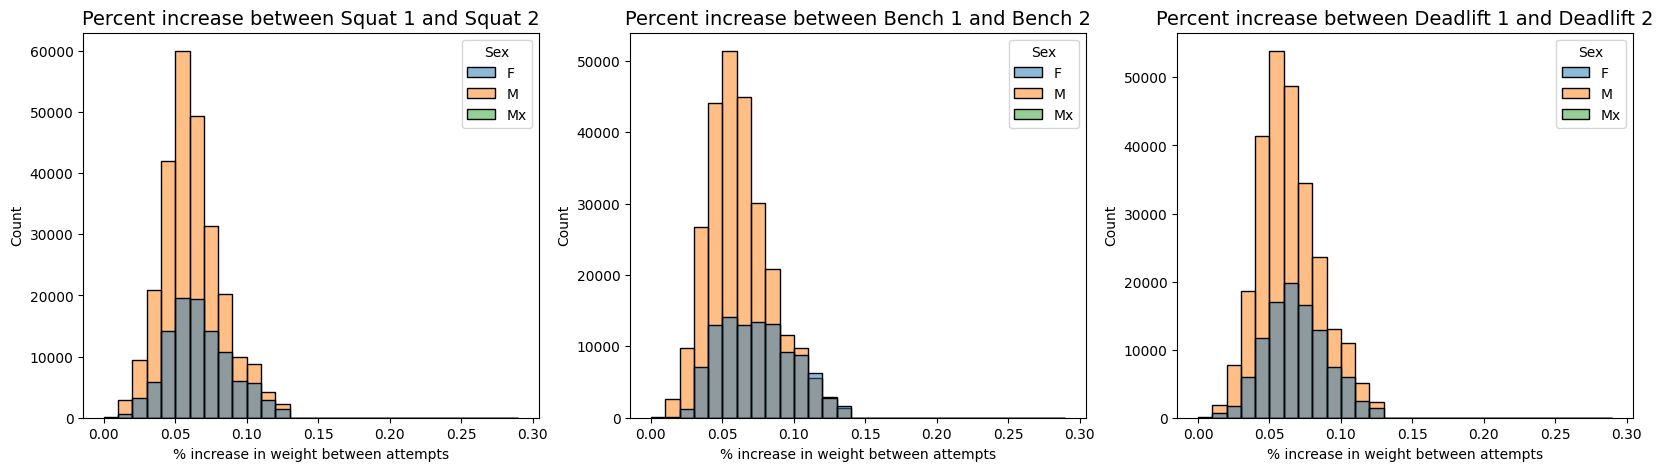

In [123]:
BINS_INCREASE_RANGE = [n * 0.01 for n in range(30)]
HIST_TICKS = [n * 0.05 for n in range(7)]
plt.figure(figsize=(20,5))

xp = 'squat12_percent_increase'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x=xp, bins=BINS_INCREASE_RANGE, hue='Sex')
plt.xticks(ticks=HIST_TICKS)
plt.title('Percent increase between Squat 1 and Squat 2', fontsize=14)       # Set title with font size
plt.xlabel("% increase in weight between attempts")


xp = 'bench12_percent_increase'
plt.subplot(1, 3, 2)
sns.histplot(data=df, x=xp, bins=BINS_INCREASE_RANGE, hue='Sex')
plt.title('Percent increase between Bench 1 and Bench 2', fontsize=14)       # Set title with font size
plt.xticks(ticks=HIST_TICKS)
plt.xlabel("% increase in weight between attempts")


xp = 'Deadlift12_percent_increase'
plt.subplot(1,3,3)
sns.histplot(data=df,x=xp, bins=BINS_INCREASE_RANGE, hue='Sex')
plt.xticks(ticks=HIST_TICKS)
plt.title('Percent increase between Deadlift 1 and Deadlift 2', fontsize=14)       # Set title with font size
plt.xlabel("% increase in weight between attempts")


plt.show()

### Jumps in Squat 1,2
Discuss the graph on the left

### Jumps in Bench 1,2
Discuss the  middle graph

### Jumps in Deadlift 1,2
Discuss the right graph

## Jumps between Attempt 2 and 3

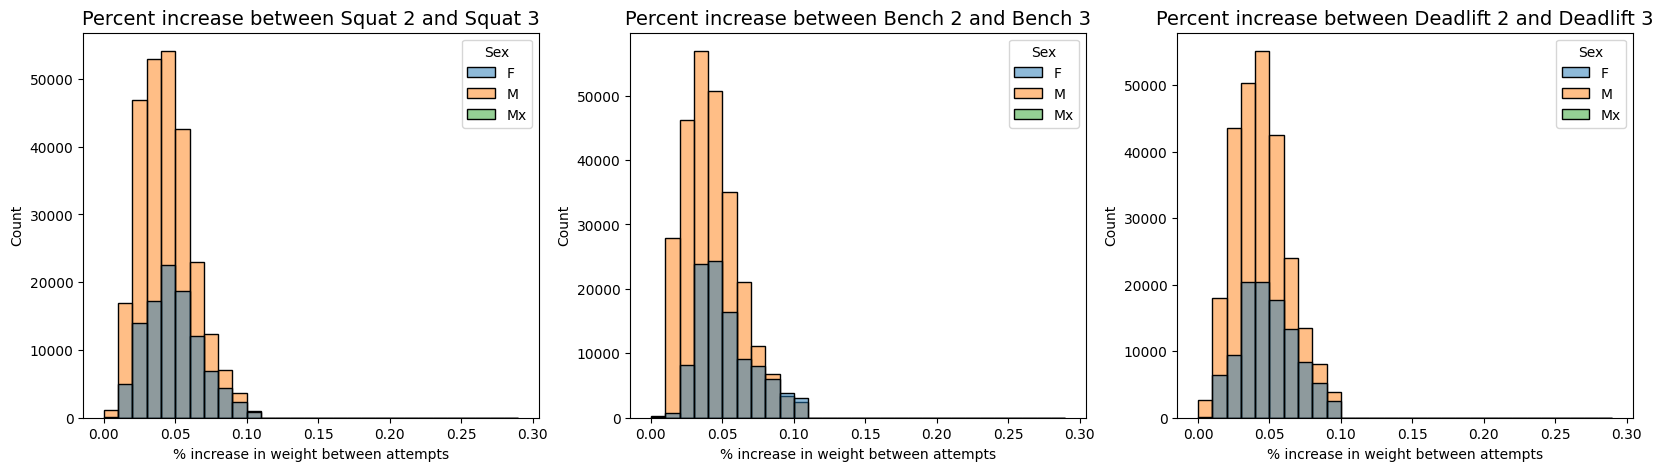

In [119]:
plt.figure(figsize=(20,5))

xp = 'squat23_percent_increase'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x=xp, bins=BINS_INCREASE_RANGE, hue='Sex')
plt.xticks(ticks=HIST_TICKS)
plt.title('Percent increase between Squat 2 and Squat 3', fontsize=14)       # Set title with font size
plt.xlabel("% increase in weight between attempts")


xp = 'bench23_percent_increase'
plt.subplot(1, 3, 2)
sns.histplot(data=df, x=xp, bins=BINS_INCREASE_RANGE, hue='Sex')
plt.xticks(ticks=HIST_TICKS)
plt.title('Percent increase between Bench 2 and Bench 3', fontsize=14)       # Set title with font size
plt.xlabel("% increase in weight between attempts")

xp = 'Deadlift23_percent_increase'
plt.subplot(1,3,3)
sns.histplot(data=df,x=xp, bins=BINS_INCREASE_RANGE, hue='Sex')
plt.xticks(ticks=HIST_TICKS)
plt.title('Percent increase between Deadlift 2 and Deadlift 3', fontsize=14)       # Set title with font size
plt.xlabel("% increase in weight between attempts")


plt.show()

### Jumps in Squat 2,3

### Jumps in Bench 2,3

### Jumps in Deadlift 2,3

## Looking closer at distribution

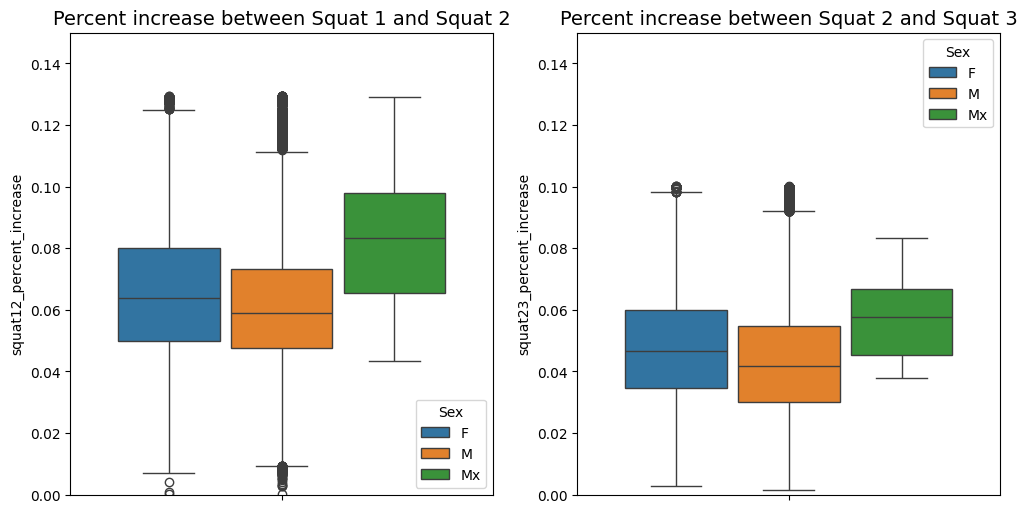

In [143]:
# Define your figure size
plt.figure(figsize=(12, 6))
min_value = 0
max_value = 0.15

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='squat12_percent_increase', hue="Sex", dodge=True, gap=0.1)
plt.ylim(min_value, max_value)
plt.title('Percent increase between Squat 1 and Squat 2', fontsize=14)       # Set title with font size


plt.subplot(1, 2, 2)
sns.boxplot(data =df, y='squat23_percent_increase', hue="Sex", dodge=True, gap=0.1)
plt.ylim(min_value, max_value)
plt.title('Percent increase between Squat 2 and Squat 3', fontsize=14)       # Set title with font size

plt.show()

## Discuss Here [REMOVE/RENAME THIS TITLE BEFORE SUBMITTING?]
looks like women take bigger jumps here, but there are more upper outliers among men?

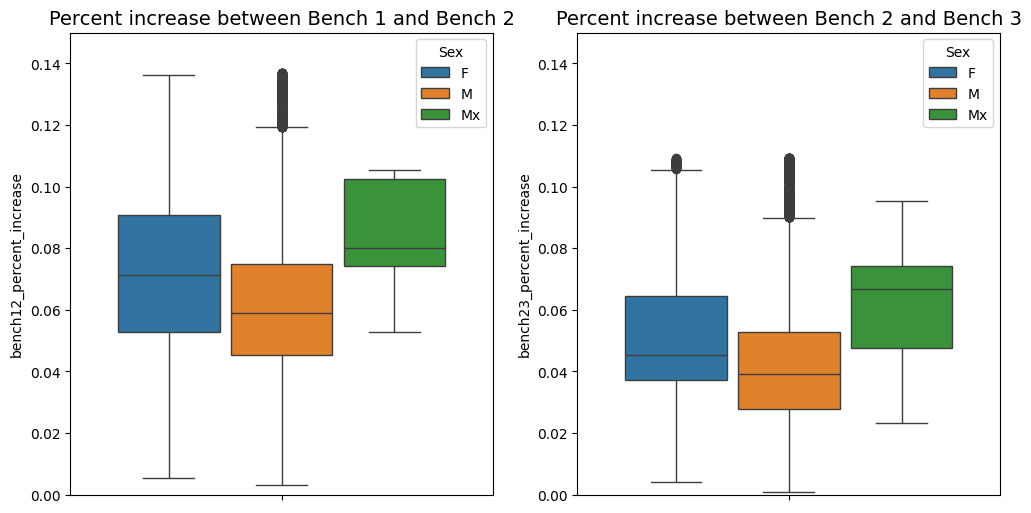

In [144]:
plt.figure(figsize=(12, 6))
min_value = 0
max_value = 0.15

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='bench12_percent_increase', hue="Sex", dodge=True, gap=0.1)
plt.ylim(min_value, max_value)
plt.title('Percent increase between Bench 1 and Bench 2', fontsize=14)       # Set title with font size


plt.subplot(1, 2, 2)
sns.boxplot(data =df, y='bench23_percent_increase', hue="Sex", dodge=True, gap=0.1)
plt.ylim(min_value, max_value)
plt.title('Percent increase between Bench 2 and Bench 3', fontsize=14)       # Set title with font size

plt.show()

## Discuss Here [REMOVE/RENAME THIS TITLE BEFORE SUBMITTING?]
- The jumps taken here are way higher than women's for men, this is surprising since men's benchesare usually heavier than women's, so maybe the amount of weight on the bar might not mean bigger jumps

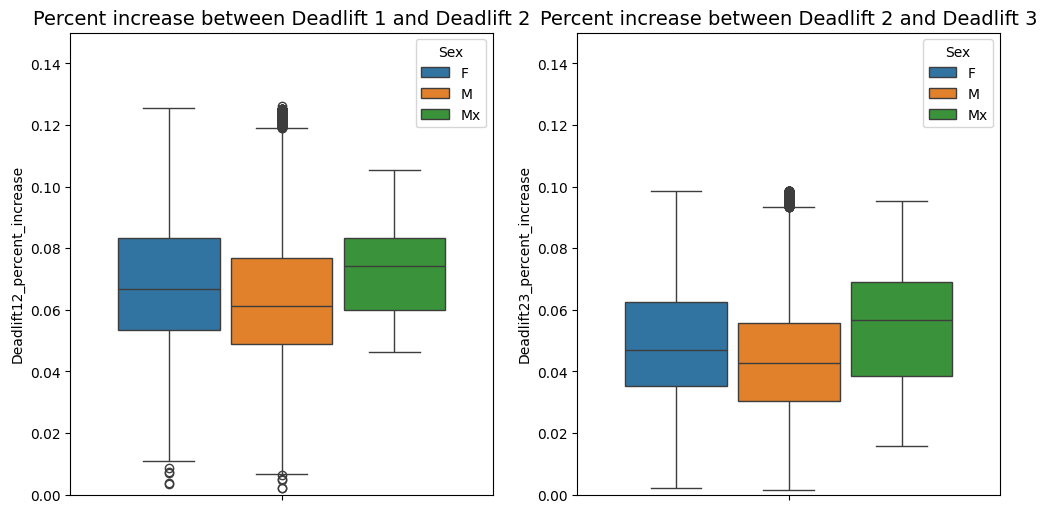

In [146]:
plt.figure(figsize=(12, 6))
min_value = 0
max_value = 0.15

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Deadlift12_percent_increase', hue="Sex", dodge=True, gap=0.1)
plt.ylim(min_value, max_value)
plt.title('Percent increase between Deadlift 1 and Deadlift 2', fontsize=14)       # Set title with font size


plt.subplot(1, 2, 2)
sns.boxplot(data =df, y='Deadlift23_percent_increase', hue="Sex", dodge=True, gap=0.1)
plt.ylim(min_value, max_value)
plt.title('Percent increase between Deadlift 2 and Deadlift 3', fontsize=14)       # Set title with font size

plt.show()

## Discuss Here [REMOVE/RENAME THIS TITLE BEFORE SUBMITTING?]
- Surprisingly even across the sexes
- Possible colinearity in attempt selection: the jump between 2 and 3 are always lower than the jump between 1 and 2.

## Linear Regressions

Ok, the data looks sufficient to answer our question, and we want to answer our hypothesis on the effect Sex and Event has on percentage increase in events.

For this we'll run multiple regressions.

- The first regression, we'll filter to only men, and see what each event's coefficient is when it comes to weight increases.
- The second regression, we'll filter to only women, and see what each event's coefficient is when it comes to weight increases.
- The third regression, we'll mesure the effect of Sex on weight increases.

We just need a bit of extra data wrangling to achieve this:

# Ethics & Privacy

In conducting our research on attempt selection in powerlifting, it's paramount to address ethical and privacy concerns throughout the data science process. Our dataset, sourced from Openpowerlifting.com, provides valuable information on powerlifting competitions, but we recognize the importance of safeguarding the privacy of individuals involved. We will ensure that the data used is anonymized and that participants' consent to data usage is respected, given that the information is publicly available. Additionally, we acknowledge potential biases within the dataset, including underrepresentation of certain demographic groups in powerlifting competitions. To mitigate these biases, we will conduct thorough exploratory data analysis to identify any imbalances and employ strategies such as stratification or oversampling to ensure equitable analysis.

Throughout the analysis, we will maintain transparency regarding the limitations and potential biases of the data. We will present findings in a fair and balanced manner, highlighting uncertainties and caveats associated with the analysis. Post-analysis, we will critically review our findings to assess their implications on different demographic groups and engage in ongoing dialogue with stakeholders to address concerns related to equity and fairness. Our research will adhere to ethical guidelines and best practices in data science, prioritizing transparency, accountability, and respect for the rights and dignity of research participants. By upholding these principles, we aim to contribute responsibly to the understanding of attempt selection in powerlifting while promoting inclusivity and ethical data use.

# Team Expectations 


## Communication
* We understand that we are all students with different coursework and load and may not be available for days to respond with input to someone's ideas or questions. 

* To give some semblance of "I have seen your message", since Discord doesn't provide read receipts, we hope to adopt a practice of reacting with an emote to messages to acknowledge them if we don't have time to craft a response at the time of reading it. [Read about reacting to messages on Discord](https://support.discord.com/hc/en-us/articles/12102061808663-Reactions-and-Super-Reactions-FAQ). The tutorial shows how to do it on PC, and can be done on mobile by holding down on a message.

## Collaboration
* Since this project is a group project, and every one should contribute equally or close to equally. Everyone should take the responsibilities of a suitable amount of the work in data wrangling, analysis, report writing, revision, etc. When the work is distributed in the meeting/discord, every team member should keep track of updates on the task, report difficulties encountered (if any) so that we can adjust the work distribution, and help each other out when in need.
* The deadline set by the group need to be maintained and every member, though has difference schedules, should complete his or her part of the work before the deadline, too.


# Project Timeline Proposal

Our main form of communication is through Discord, to account for changing schedules like midterms/other class deadlines, meeting times should be discussed every week to be as early as all our schedules allow so we can all be on the same page and have time to work on how we decide the split the tasks each week. We believe the table below, which was provided in the template of this proposal, is good for the quarter. 


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  Discuss on Discord | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  Discuss on Discord |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/11  | Discuss on Discord  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches|
| 2/18  | Discuss on Discord  | Assign group members to lead each specific part; Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan|
| 2/25  | Discuss on Discord  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 3/13  | Discuss on Discord  | Complete analysis; Draft results/conclusion/discussion| Review project report; Edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |